In [1]:
!pip install datasets --quiet


In [2]:
from datasets import load_dataset

# Load the floor plans dataset
dataset = load_dataset("bankole/floor-plans-dataset")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/325 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/55.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1454 [00:00<?, ? examples/s]

In [3]:
# Show dataset structure
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['image', 'description'],
        num_rows: 1454
    })
})


In [4]:
from datasets import load_dataset
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

dict_keys(['image', 'description'])
This floor plan contains 3 room(s). The layout includes 7 door(s)  2 double door(s). There are 5 window(s) in the design.


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

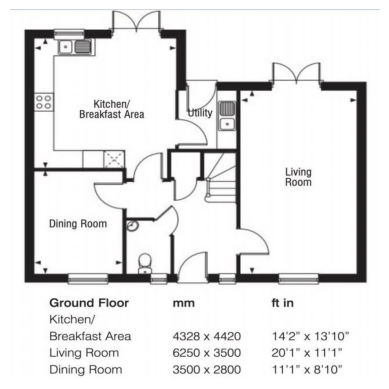

In [5]:
example = dataset["train"][0]
print(example.keys())      # see what fields exist
print(example["description"])  # view caption or label text if available

# Display the image
image = example["image"]
if hasattr(image, "convert"):
    plt.imshow(image.convert("RGB"))
else:
    plt.imshow(Image.fromarray(np.array(image)))
plt.axis("off")


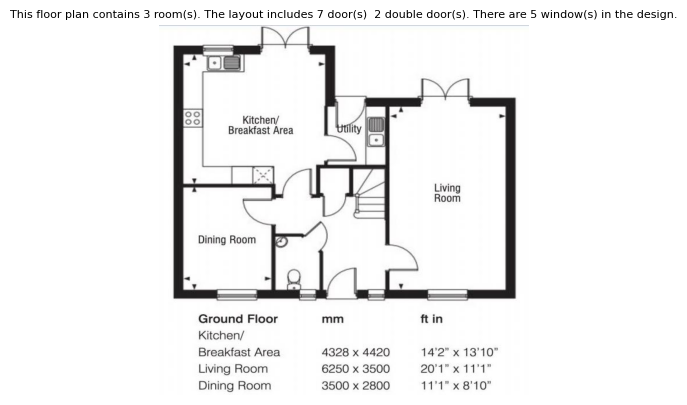

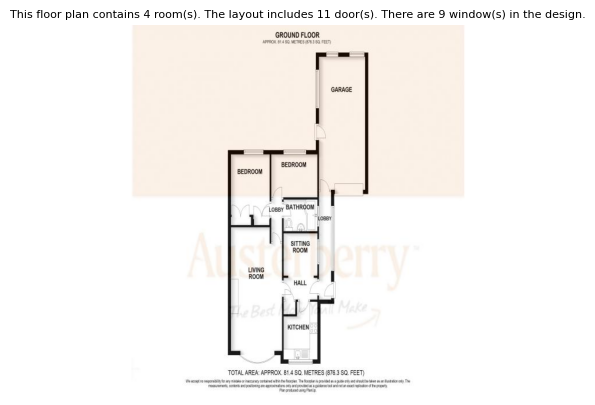

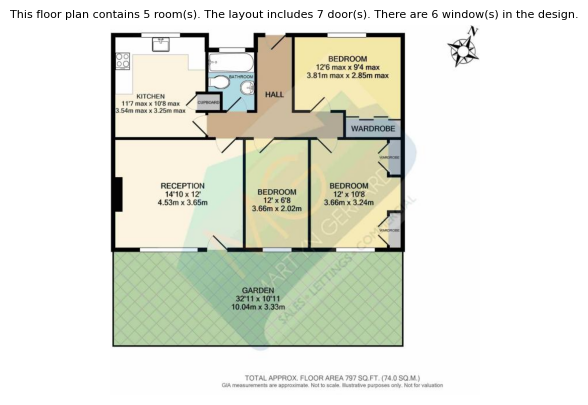

In [6]:
for i in range(3):
    img = dataset["train"][i]["image"]
    caption = dataset["train"][i]["description"]
    plt.imshow(img)
    plt.title(caption, fontsize=8)
    plt.axis("off")
    plt.show()


Filter:   0%|          | 0/1454 [00:00<?, ? examples/s]

After dropping null/empty descriptions: 1454


Removing duplicates: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1454/1454 [00:12<00:00, 111.99it/s]


Unique examples: 1354
‚úÖ Final cleaned dataset size: 1354


Saving the dataset (0/1 shards):   0%|          | 0/1354 [00:00<?, ? examples/s]

üíæ Cleaned dataset saved to 'Cleaned_FloorPlans/'
üì∏ Saving images and building CSV...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1354/1354 [01:05<00:00, 20.66it/s]


‚úÖ Created 'floorplan_pairs.csv' with image‚Äìdescription pairs.


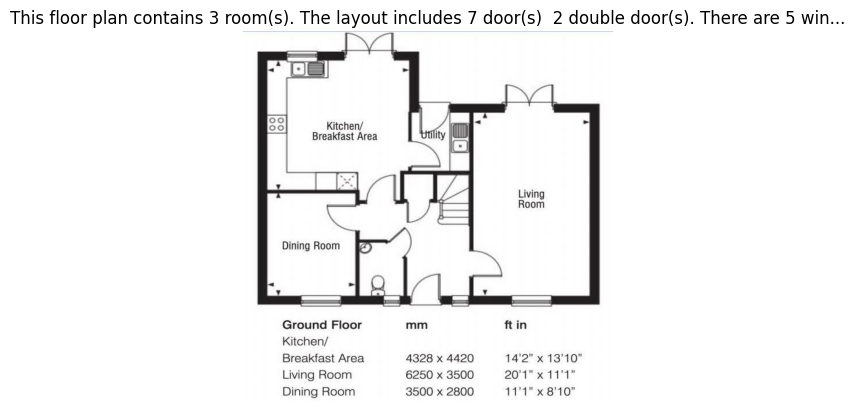

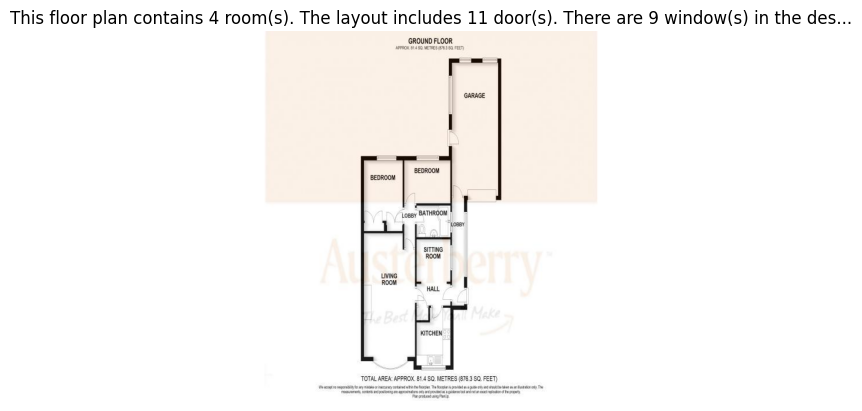

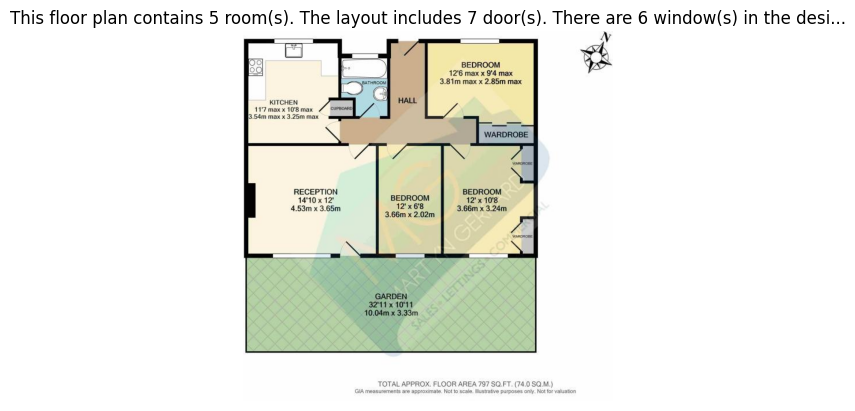

In [7]:
from datasets import Dataset
import numpy as np
import hashlib
from tqdm import tqdm
import pandas as pd
import os

# 1Ô∏è‚É£ Drop null or empty descriptions
def has_valid_description(example):
    txt = example.get("description", None)
    return txt is not None and str(txt).strip() != ""

dataset["train"] = dataset["train"].filter(has_valid_description)
print("After dropping null/empty descriptions:", len(dataset["train"]))

# 2Ô∏è‚É£ Remove duplicates (same image + same description)
def hash_example(example):
    img = example["image"]
    img_arr = np.array(img) if not isinstance(img, np.ndarray) else img
    img_hash = hashlib.md5(img_arr.tobytes()).hexdigest()
    txt = str(example["description"]).strip()
    return img_hash + "|" + txt

hashes = set()
unique_examples = []
for ex in tqdm(dataset["train"], desc="Removing duplicates"):
    h = hash_example(ex)
    if h not in hashes:
        hashes.add(h)
        unique_examples.append(ex)

print(f"Unique examples: {len(unique_examples)}")

# 3Ô∏è‚É£ Build cleaned dataset
cleaned_dataset = Dataset.from_list(unique_examples)
print("‚úÖ Final cleaned dataset size:", len(cleaned_dataset))

# 4Ô∏è‚É£ Save cleaned dataset locally
cleaned_dataset.save_to_disk("Cleaned_FloorPlans")
print("üíæ Cleaned dataset saved to 'Cleaned_FloorPlans/'")

# 5Ô∏è‚É£ üí° Create a CSV file pairing each image with its description
os.makedirs("floorplan_images", exist_ok=True)
csv_records = []

print("üì∏ Saving images and building CSV...")
for i, ex in enumerate(tqdm(unique_examples)):
    img = ex["image"]
    desc = ex["description"]
    img_path = f"floorplan_images/floorplan_{i:04d}.png"
    img.convert("RGB").save(img_path)
    csv_records.append({"image_path": img_path, "description": desc})

# Save the CSV
csv_df = pd.DataFrame(csv_records)
csv_df.to_csv("floorplan_pairs.csv", index=False)
print("‚úÖ Created 'floorplan_pairs.csv' with image‚Äìdescription pairs.")

# 6Ô∏è‚É£ (Optional) Preview a few cleaned samples
import matplotlib.pyplot as plt
for i in range(min(3, len(cleaned_dataset))):
    ex = cleaned_dataset[i]
    plt.imshow(ex["image"].convert("RGB"))
    plt.title(ex["description"][:100] + "...")
    plt.axis("off")
    plt.show()


In [8]:
print (cleaned_dataset)

Dataset({
    features: ['image', 'description'],
    num_rows: 1354
})


Total samples: 1354


Analyzing images: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1354/1354 [00:02<00:00, 482.79it/s]



üìè Image Statistics:
        width  height
count  1354.0  1354.0
mean    640.0   640.0
std       0.0     0.0
min     640.0   640.0
25%     640.0   640.0
50%     640.0   640.0
75%     640.0   640.0
max     640.0   640.0

üé® Image Mode Counts:
mode
RGB    1354
Name: count, dtype: int64

üìù Text Statistics:
       char_length   word_count
count  1354.000000  1354.000000
mean    113.113737    19.511078
std      11.550733     1.877303
min      66.000000    11.000000
25%     103.000000    18.000000
50%     105.000000    18.000000
75%     122.000000    21.000000
max     161.000000    27.000000


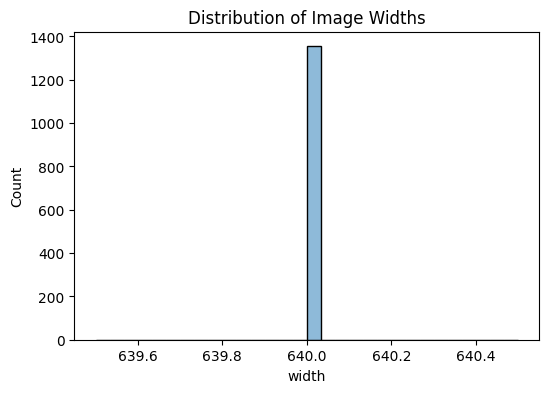

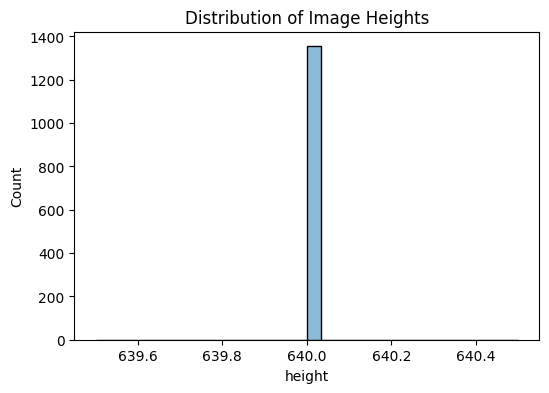

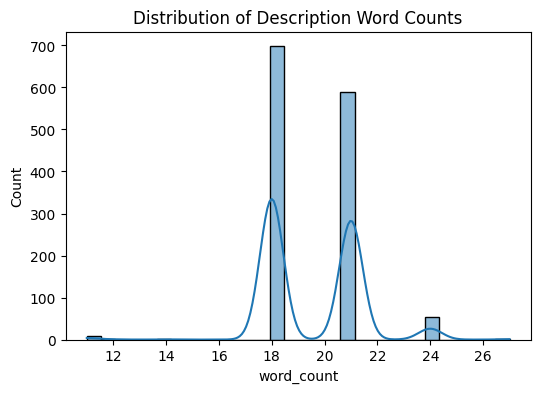

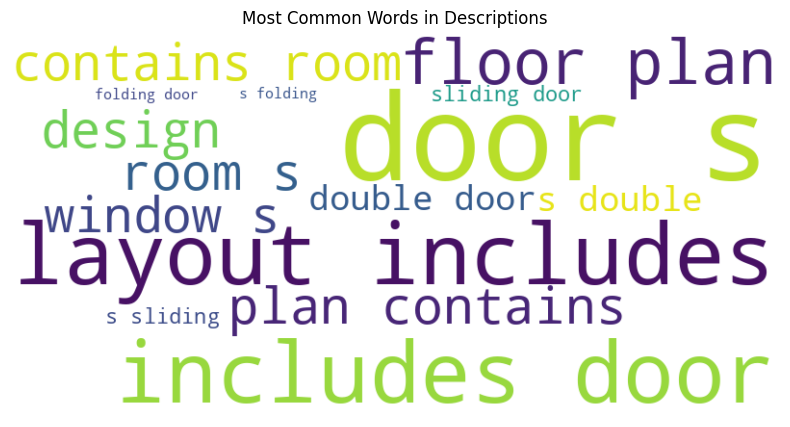


üìä Summary:
total_samples: 1354
avg_image_width: 640.0
avg_image_height: 640.0
most_common_mode: RGB
avg_word_count: 19.511078286558345
avg_char_length: 113.11373707533235


In [9]:
!pip install pandas matplotlib seaborn wordcloud tqdm --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from tqdm import tqdm
from PIL import Image

# üëá Replace with your actual dataset variable
# e.g. cleaned_dataset = load_from_disk("Cleaned_FloorPlans")

# --- 1Ô∏è‚É£ Extract basic info ---
num_samples = len(cleaned_dataset)
print(f"Total samples: {num_samples}")

# --- 2Ô∏è‚É£ Analyze image properties ---
widths, heights, modes = [], [], []

for i in tqdm(range(num_samples), desc="Analyzing images"):
    img = cleaned_dataset[i]["image"]
    widths.append(img.width)
    heights.append(img.height)
    modes.append(img.mode)

image_df = pd.DataFrame({
    "width": widths,
    "height": heights,
    "mode": modes
})

print("\nüìè Image Statistics:")
print(image_df.describe())
print("\nüé® Image Mode Counts:")
print(image_df["mode"].value_counts())

# --- 3Ô∏è‚É£ Analyze text properties ---
descriptions = [cleaned_dataset[i]["description"] for i in range(num_samples)]
text_lengths = [len(d) for d in descriptions]
word_counts = [len(d.split()) for d in descriptions]

text_df = pd.DataFrame({
    "description": descriptions,
    "char_length": text_lengths,
    "word_count": word_counts
})

print("\nüìù Text Statistics:")
print(text_df[["char_length", "word_count"]].describe())

# --- 4Ô∏è‚É£ Visual Insights ---
plt.figure(figsize=(6,4))
sns.histplot(image_df["width"], bins=30, kde=True)
plt.title("Distribution of Image Widths")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(image_df["height"], bins=30, kde=True)
plt.title("Distribution of Image Heights")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(text_df["word_count"], bins=30, kde=True)
plt.title("Distribution of Description Word Counts")
plt.show()

# --- 5Ô∏è‚É£ Word Cloud for descriptions ---
all_text = " ".join(descriptions)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Descriptions")
plt.show()

# --- 6Ô∏è‚É£ Summary report ---
summary = {
    "total_samples": num_samples,
    "avg_image_width": np.mean(widths),
    "avg_image_height": np.mean(heights),
    "most_common_mode": max(set(modes), key=modes.count),
    "avg_word_count": np.mean(word_counts),
    "avg_char_length": np.mean(text_lengths),
}

print("\nüìä Summary:")
for k, v in summary.items():
    print(f"{k}: {v}")


Resizing and padding images: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1354/1354 [00:22<00:00, 61.34it/s]


‚úÖ All images resized and padded to 512√ó512.
New dataset size: 1354


Saving the dataset (0/1 shards):   0%|          | 0/1354 [00:00<?, ? examples/s]

üíæ Saved resized dataset as 'Cleaned_FloorPlans_512'


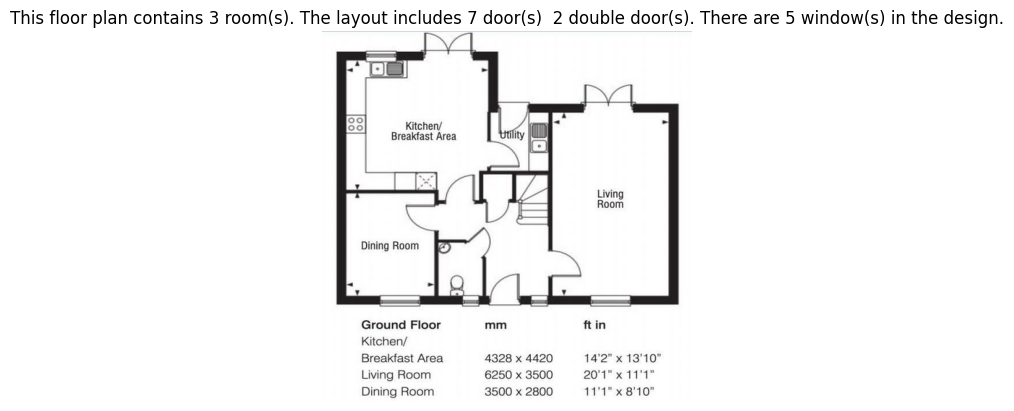

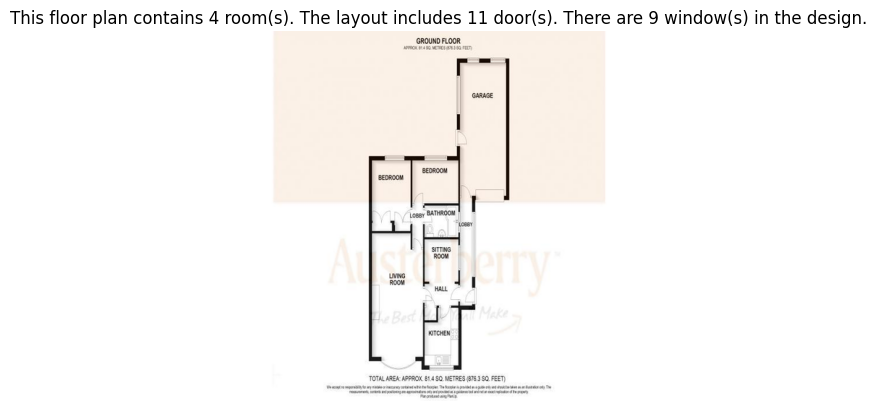

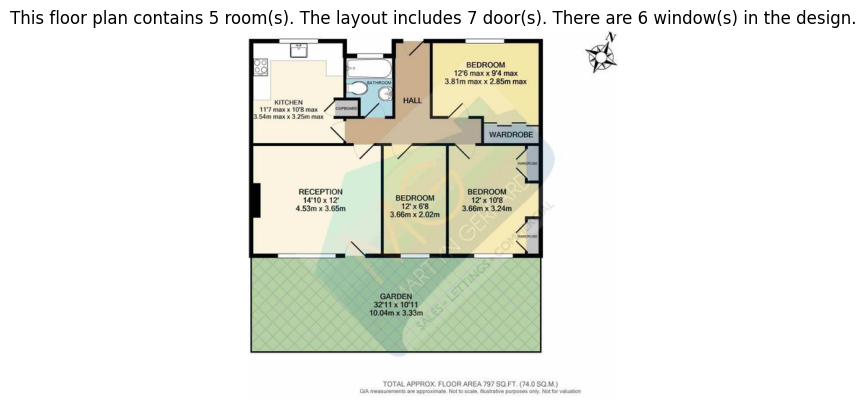

In [19]:
from PIL import Image
import numpy as np
from tqdm import tqdm
from datasets import Dataset

# --- 1Ô∏è‚É£ Define function to resize and pad ---
def resize_and_pad(img, target_size=512, pad_color=(255, 255, 255)):
    # Ensure it's a PIL image
    if not isinstance(img, Image.Image):
        img = Image.fromarray(np.array(img))

    # Resize while keeping aspect ratio
    img.thumbnail((target_size, target_size), Image.LANCZOS)

    # Create new background (white)
    new_img = Image.new("RGB", (target_size, target_size), pad_color)

    # Center the image
    left = (target_size - img.width) // 2
    top = (target_size - img.height) // 2
    new_img.paste(img, (left, top))
    return new_img

# --- 2Ô∏è‚É£ Apply transformation to all images ---
resized_data = []
for i in tqdm(range(len(cleaned_dataset)), desc="Resizing and padding images"):
    example = cleaned_dataset[i]
    img = example["image"]
    description = example["description"]

    new_img = resize_and_pad(img, target_size=512)
    resized_data.append({
        "image": new_img,
        "description": description
    })

# --- 3Ô∏è‚É£ Rebuild dataset with resized images ---
resized_dataset = Dataset.from_list(resized_data)
print("‚úÖ All images resized and padded to 512√ó512.")
print("New dataset size:", len(resized_dataset))

# --- 4Ô∏è‚É£ Save the updated dataset ---
resized_dataset.save_to_disk("Cleaned_FloorPlans_512")

print("üíæ Saved resized dataset as 'Cleaned_FloorPlans_512'")

# --- 5Ô∏è‚É£ Preview a few examples ---
import matplotlib.pyplot as plt

for i in range(3):
    ex = resized_dataset[i]
    plt.imshow(ex["image"])
    plt.title(ex["description"])
    plt.axis("off")
    plt.show()


Total samples: 1354


Analyzing images: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1354/1354 [00:07<00:00, 177.35it/s]



üìè Image Statistics:
        width  height
count  1354.0  1354.0
mean    512.0   512.0
std       0.0     0.0
min     512.0   512.0
25%     512.0   512.0
50%     512.0   512.0
75%     512.0   512.0
max     512.0   512.0

üé® Image Mode Counts:
mode
RGB    1354
Name: count, dtype: int64

üìù Text Statistics:
       char_length   word_count
count  1354.000000  1354.000000
mean    113.113737    19.511078
std      11.550733     1.877303
min      66.000000    11.000000
25%     103.000000    18.000000
50%     105.000000    18.000000
75%     122.000000    21.000000
max     161.000000    27.000000


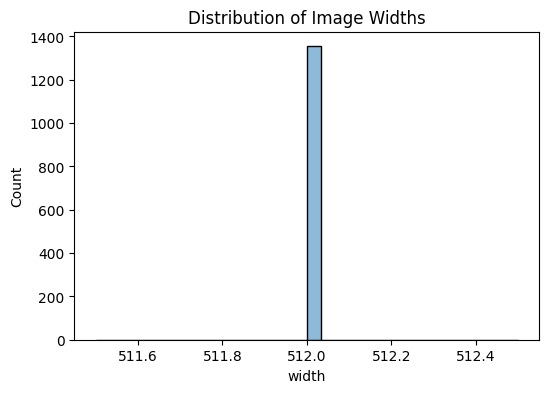

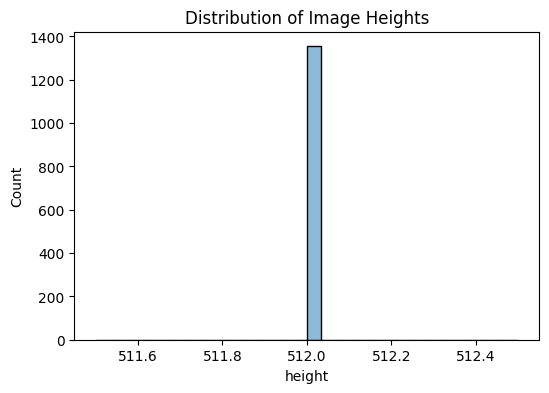

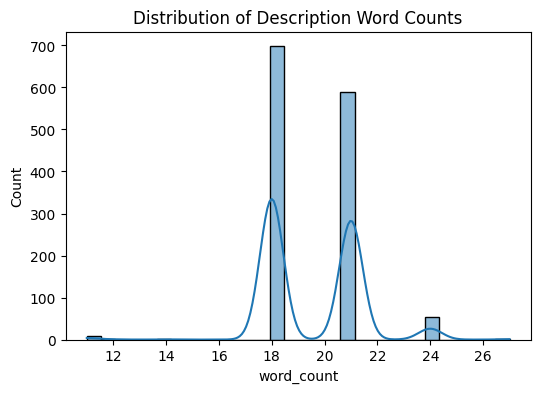

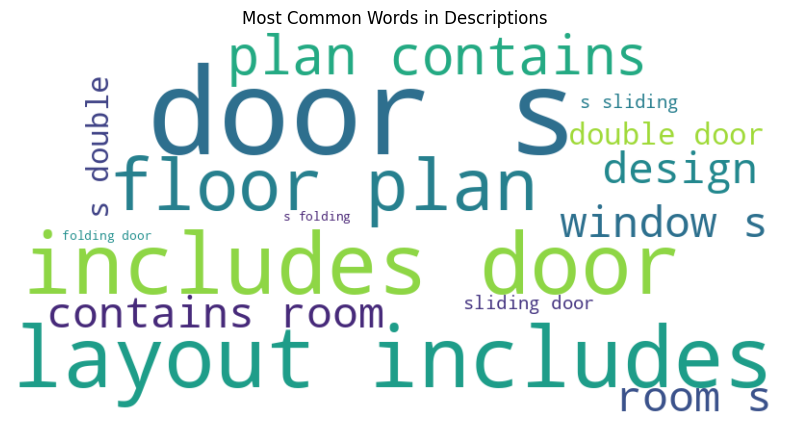


üìä Summary:
total_samples: 1354
avg_image_width: 512.0
avg_image_height: 512.0
most_common_mode: RGB
avg_word_count: 19.511078286558345
avg_char_length: 113.11373707533235


In [20]:
!pip install pandas matplotlib seaborn wordcloud tqdm --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from tqdm import tqdm
from PIL import Image
from datasets import load_from_disk

# ‚úÖ Load your resized dataset
cleaned_dataset = load_from_disk("Cleaned_FloorPlans_512")

# --- 1Ô∏è‚É£ Extract basic info ---
num_samples = len(cleaned_dataset)
print(f"Total samples: {num_samples}")
# --- 2Ô∏è‚É£ Analyze image properties ---
widths, heights, modes = [], [], []

for i in tqdm(range(num_samples), desc="Analyzing images"):
    img = cleaned_dataset[i]["image"]
    widths.append(img.width)
    heights.append(img.height)
    modes.append(img.mode)

image_df = pd.DataFrame({
    "width": widths,
    "height": heights,
    "mode": modes
})

print("\nüìè Image Statistics:")
print(image_df.describe())
print("\nüé® Image Mode Counts:")
print(image_df["mode"].value_counts())

# --- 3Ô∏è‚É£ Analyze text properties ---
descriptions = [cleaned_dataset[i]["description"] for i in range(num_samples)]
text_lengths = [len(d) for d in descriptions]
word_counts = [len(d.split()) for d in descriptions]

text_df = pd.DataFrame({
    "description": descriptions,
    "char_length": text_lengths,
    "word_count": word_counts
})

print("\nüìù Text Statistics:")
print(text_df[["char_length", "word_count"]].describe())

# --- 4Ô∏è‚É£ Visual Insights ---
plt.figure(figsize=(6,4))
sns.histplot(image_df["width"], bins=30, kde=True)
plt.title("Distribution of Image Widths")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(image_df["height"], bins=30, kde=True)
plt.title("Distribution of Image Heights")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(text_df["word_count"], bins=30, kde=True)
plt.title("Distribution of Description Word Counts")
plt.show()

# --- 5Ô∏è‚É£ Word Cloud for descriptions ---
all_text = " ".join(descriptions)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Descriptions")
plt.show()

# --- 6Ô∏è‚É£ Summary report ---
summary = {
    "total_samples": num_samples,
    "avg_image_width": np.mean(widths),
    "avg_image_height": np.mean(heights),
    "most_common_mode": max(set(modes), key=modes.count),
    "avg_word_count": np.mean(word_counts),
    "avg_char_length": np.mean(text_lengths),
}

print("\nüìä Summary:")
for k, v in summary.items():
    print(f"{k}: {v}")

In [21]:
import os, pandas as pd, shutil
from google.colab import files
from tqdm import tqdm

# 1Ô∏è‚É£ Create new folder for resized images
os.makedirs("floorplan_images_512", exist_ok=True)

# 2Ô∏è‚É£ Save each resized image + collect text
pairs = []
for i in tqdm(range(len(resized_dataset)), desc="Exporting resized images"):
    img = resized_dataset[i]["image"]
    desc = resized_dataset[i]["description"]

    path = f"floorplan_images_512/floorplan_{i:04d}.png"
    img.save(path)
    pairs.append({"image_path": path, "description": desc})

# 3Ô∏è‚É£ Save CSV for the resized set
df = pd.DataFrame(pairs)
df.to_csv("floorplan_pairs_512.csv", index=False)
print("‚úÖ Saved CSV and images for resized dataset.")

# 4Ô∏è‚É£ Zip + download
shutil.make_archive("floorplan_data_512", 'zip', ".", "floorplan_images_512")
!zip -q floorplan_data_512.zip floorplan_pairs_512.csv
files.download("floorplan_data_512.zip")

print("üì• Download started ‚Äî resized 512√ó512 images + CSV are in one zip file.")


Exporting resized images: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1354/1354 [01:12<00:00, 18.71it/s]


‚úÖ Saved CSV and images for resized dataset.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

üì• Download started ‚Äî resized 512√ó512 images + CSV are in one zip file.


In [22]:
import shutil
from google.colab import files

# Zip and download
shutil.make_archive("Cleaned_FloorPlans_512", 'zip', ".", "Cleaned_FloorPlans_512")
files.download("Cleaned_FloorPlans_512.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import nbformat

# Path to your notebook (change the name if needed)
nb_path = "/content/drive/MyDrive/Colab Notebooks/clean data project final one.ipynb"

# Read the notebook
with open(nb_path, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Remove widget metadata if it exists
if 'widgets' in nb.metadata:
    del nb.metadata['widgets']

# Save a cleaned copy
clean_path = "/content/drive/MyDrive/Colab Notebooks/clean_data_project_clean.ipynb"
with open(clean_path, 'w', encoding='utf-8') as f:
    nbformat.write(nb, f)

print("‚úÖ Clean notebook saved to:", clean_path)
